<div style='background-color: orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#part1'>Graphs and Stats</a></li>
<li><a href='#???'>I don't fucking know yet</a></li>
<li><a href='#misc'>Miscellaneous</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from scipy import stats

# Glorious itertools
import itertools

# Scaling (sklearn)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# .py files
import wrangle as w

<div style='background-color: orange'>
<a id='part1'></a>
    <b><u><i><h1 style='text-align: center'>
        Graphs and stats
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

In [2]:
train, validate, test = w.wrangle_wines_mvp()
train.sample()

train.shape:(3637, 13)
validate.shape:(1560, 13)
test.shape:(1300, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1421            6.2              0.18         0.49             4.5      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1421                 17.0                  90.0   0.9919  3.27       0.37   

      alcohol  quality wine_color  
1421     11.6        6      white

In [22]:
wines = pd.read_csv('wines.csv', index_col=0)

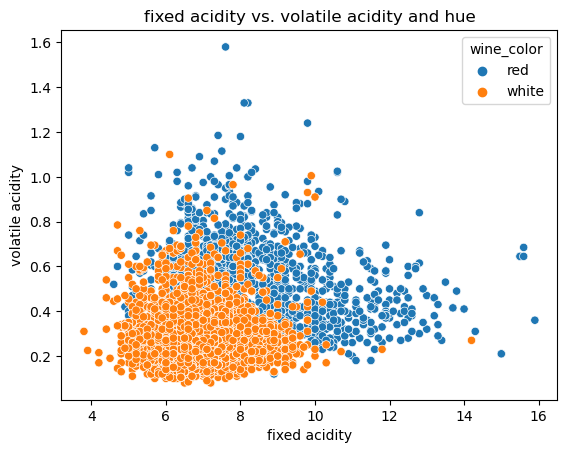

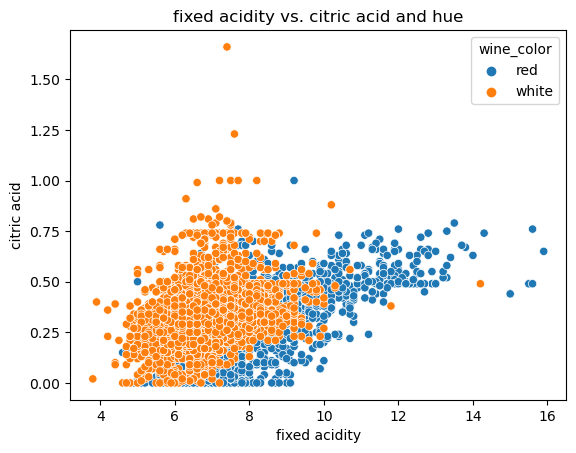

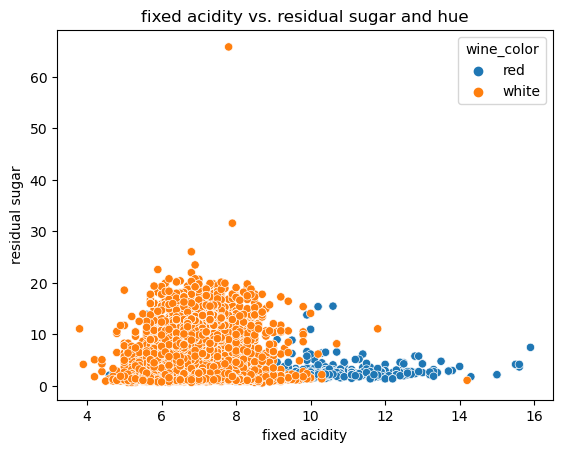

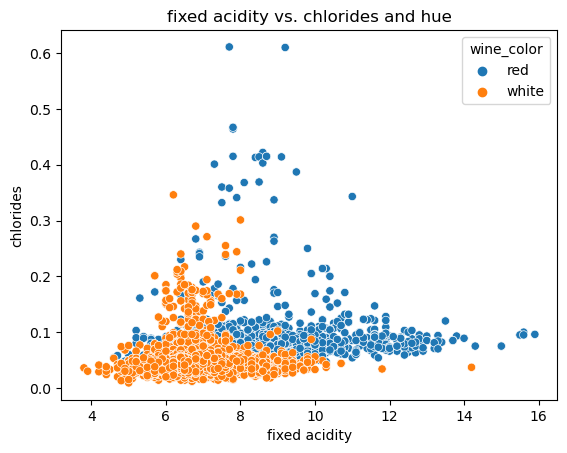

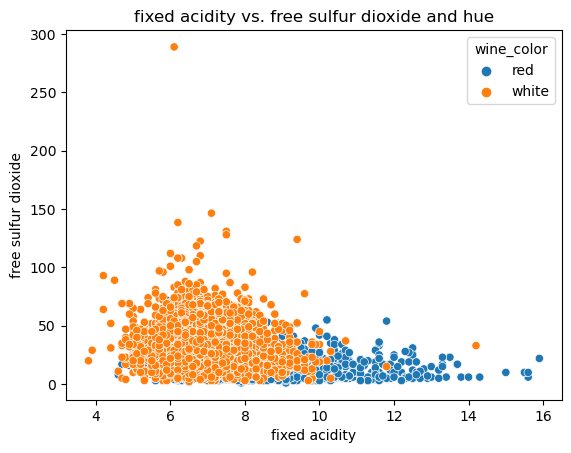

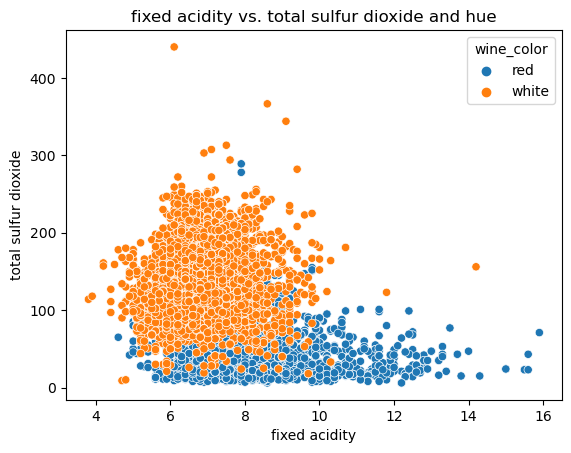

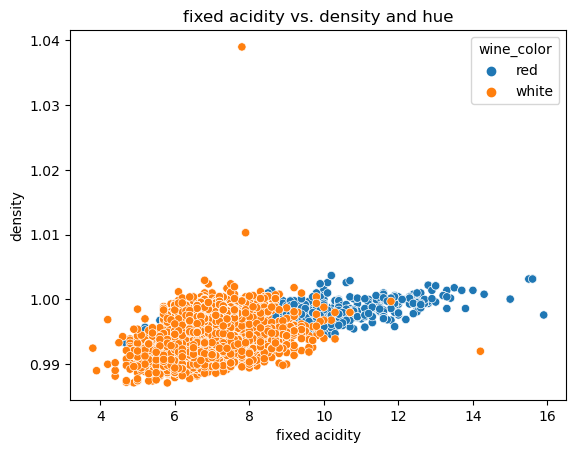

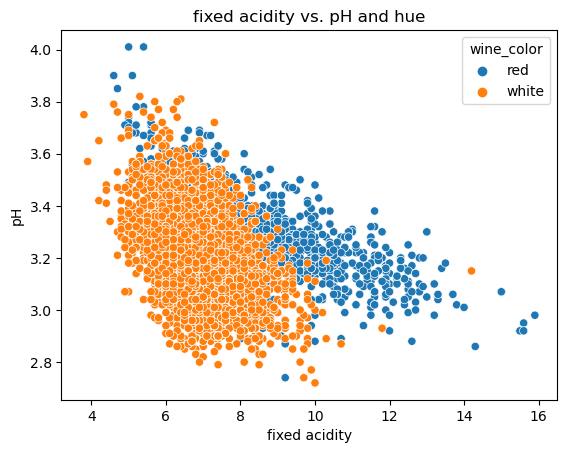

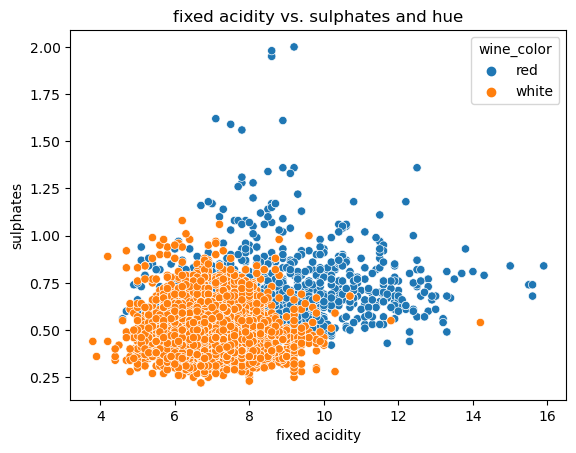

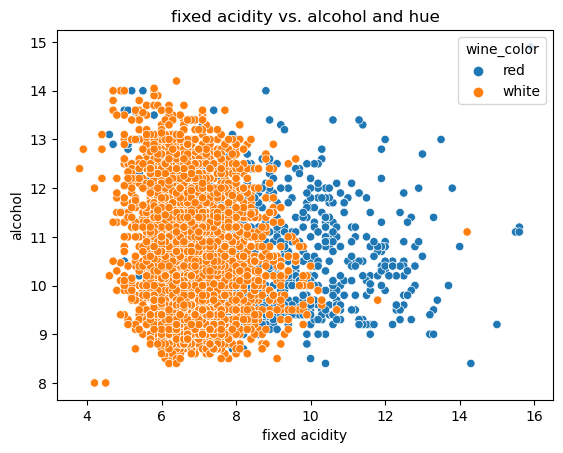

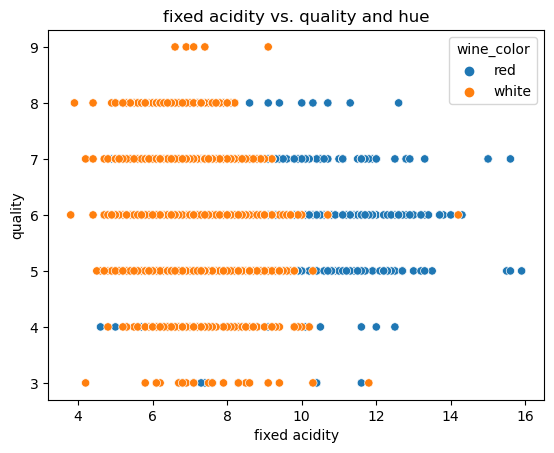

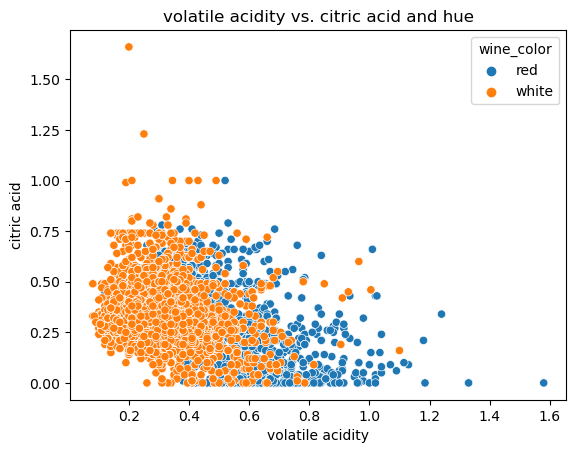

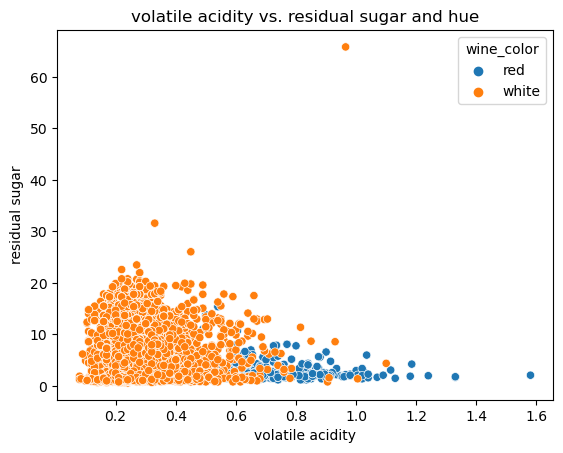

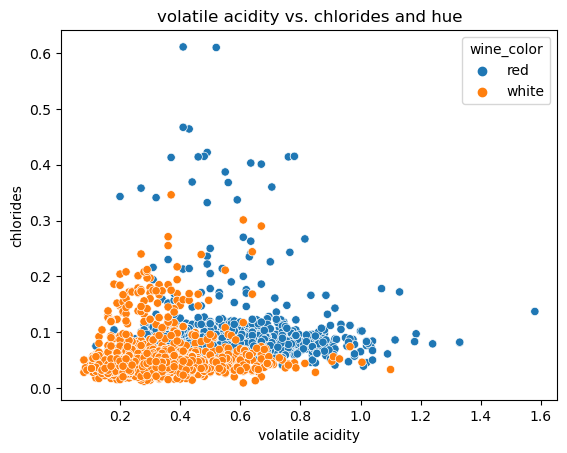

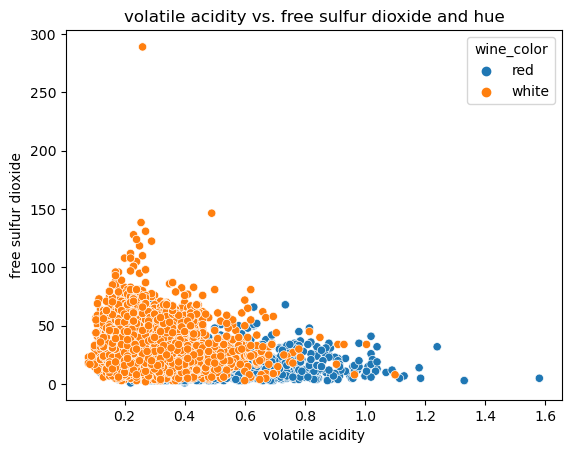

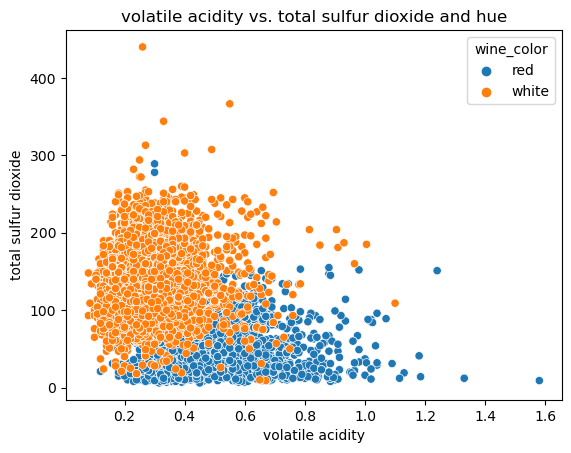

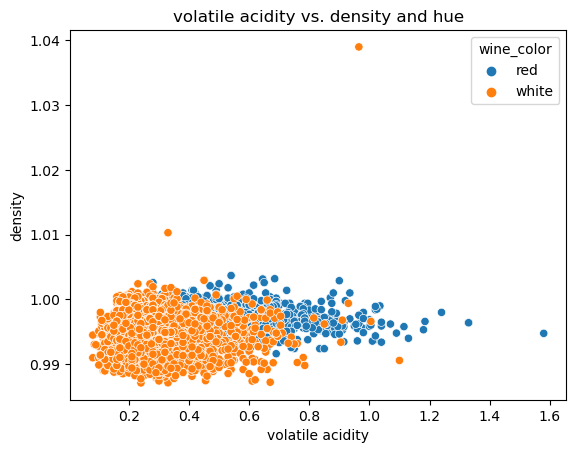

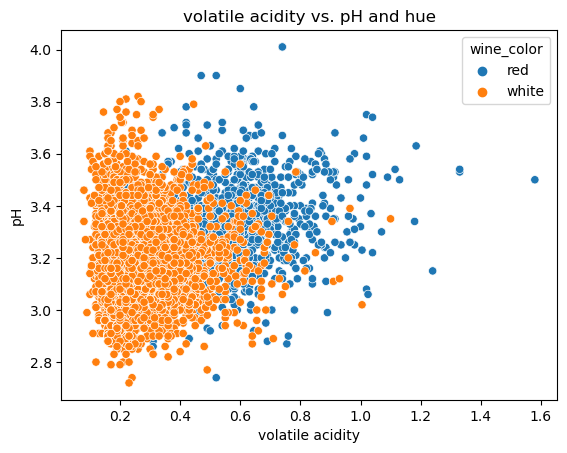

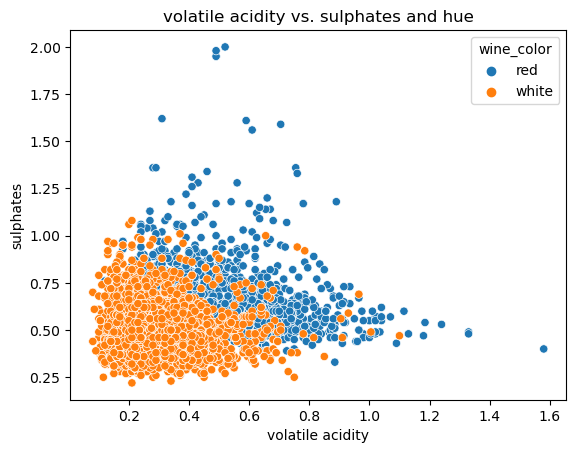

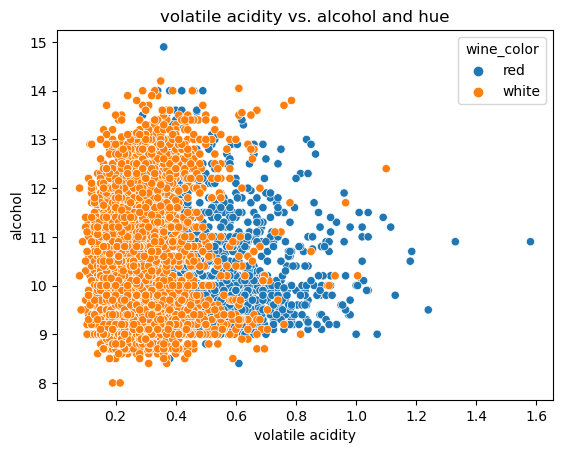

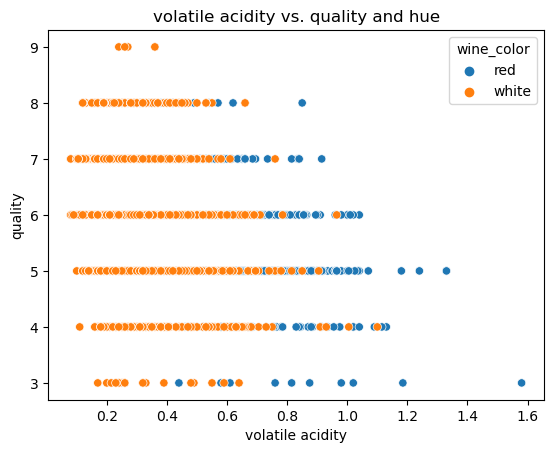

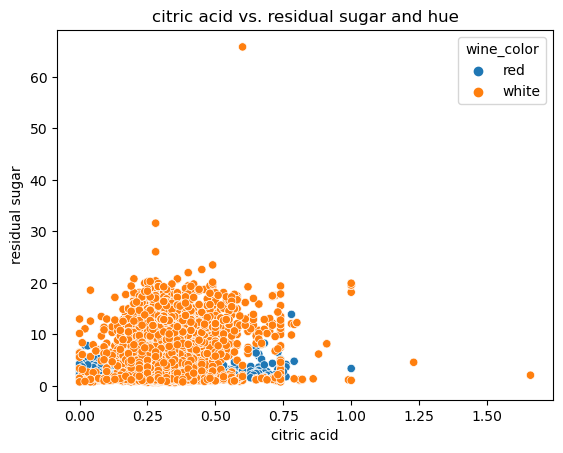

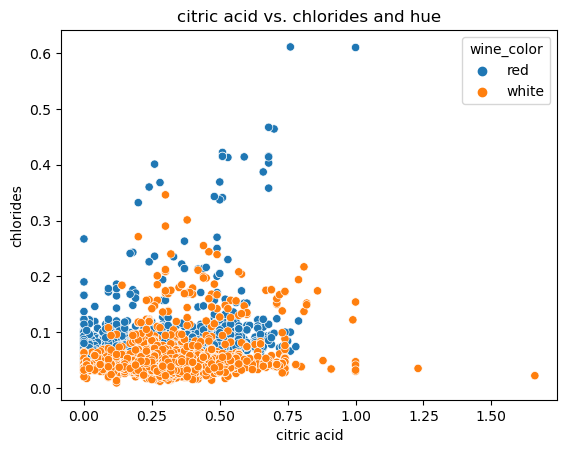

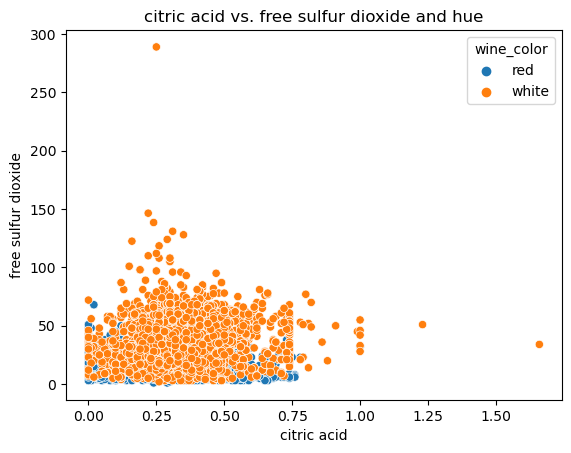

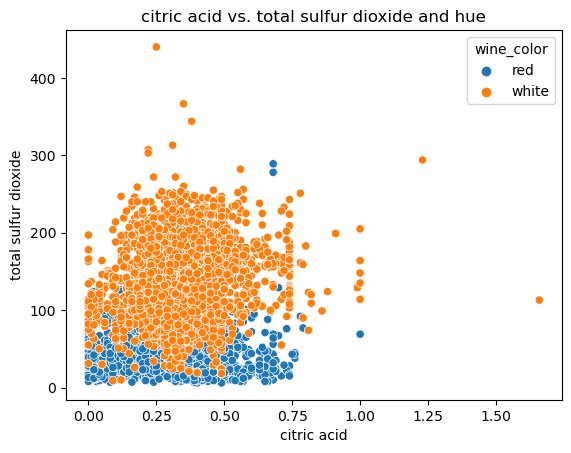

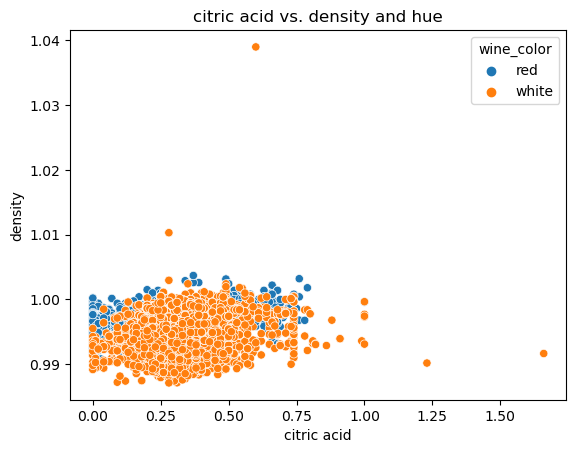

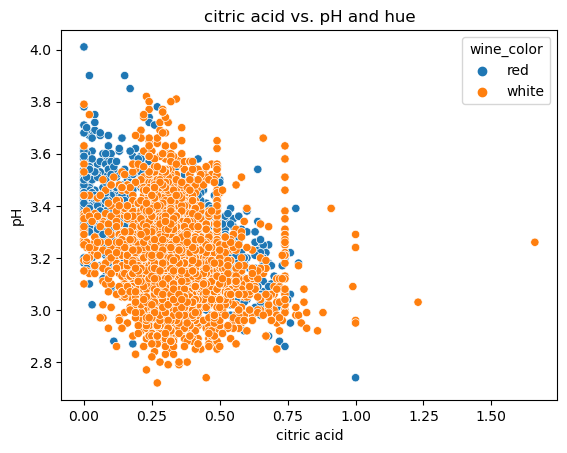

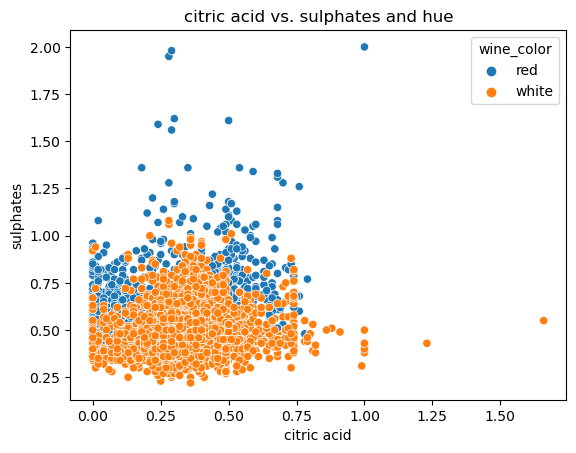

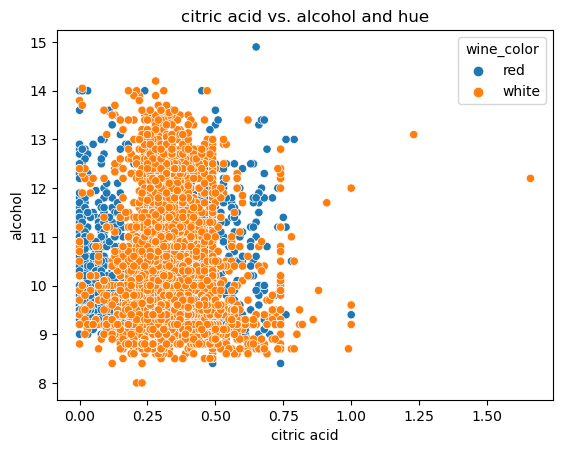

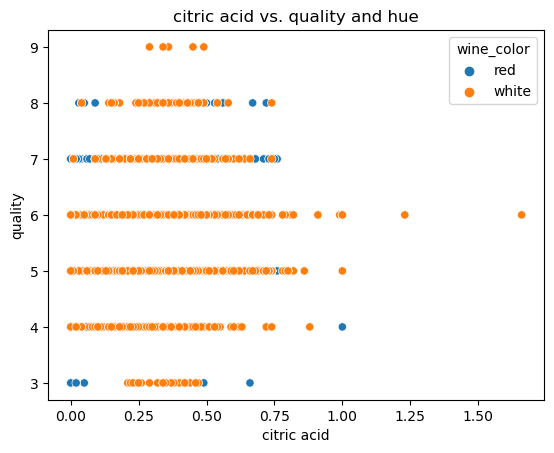

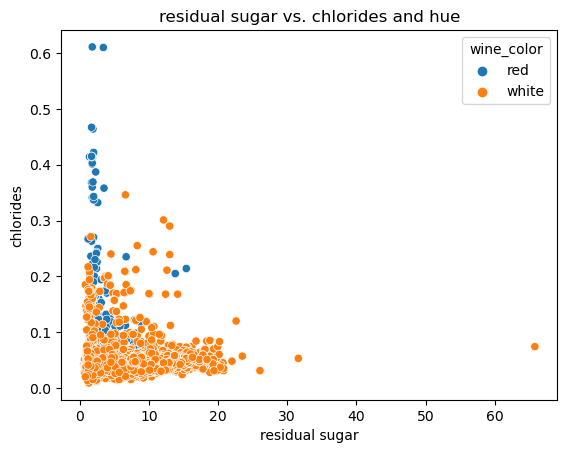

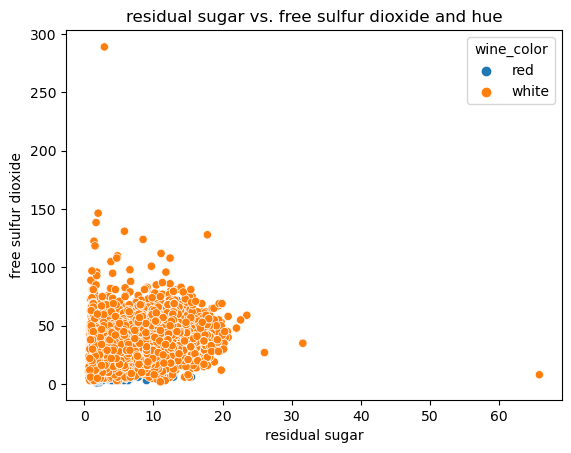

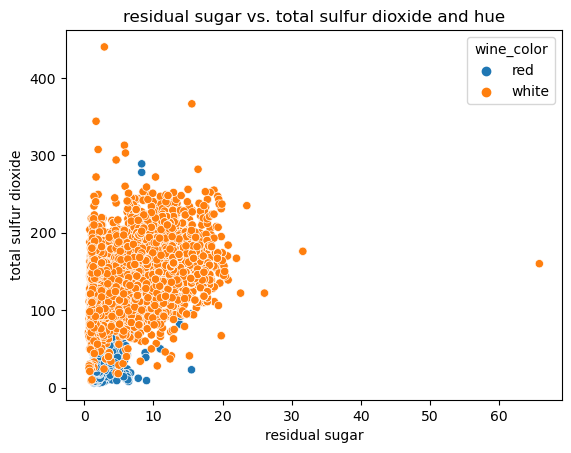

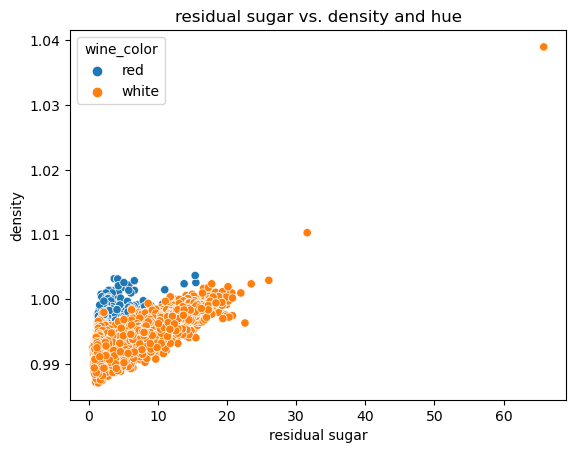

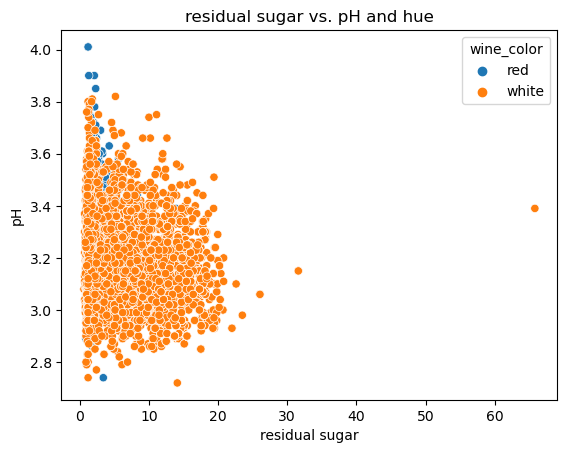

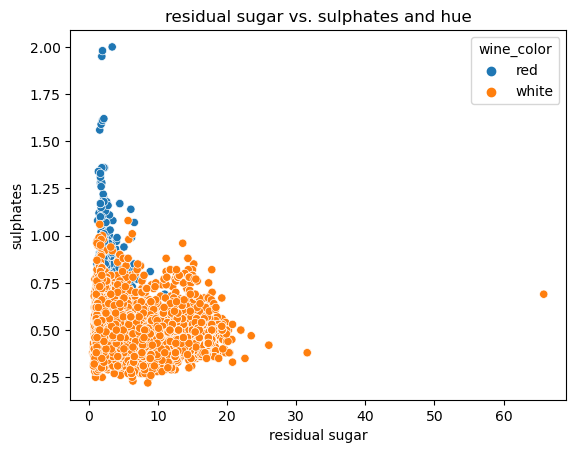

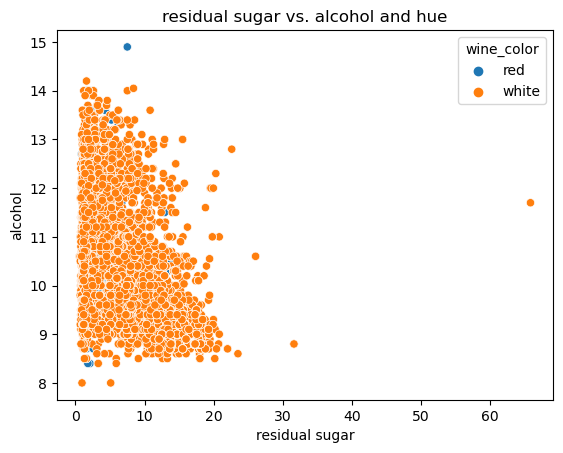

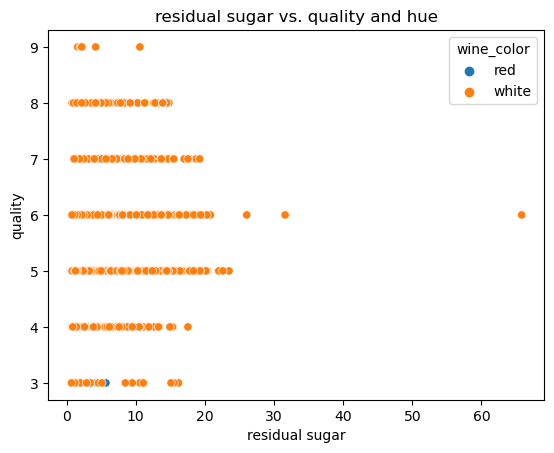

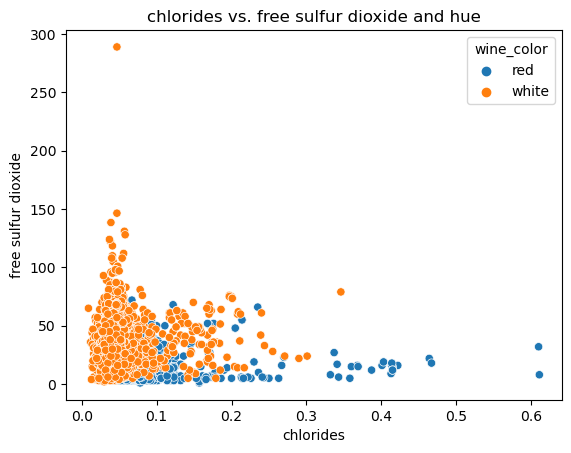

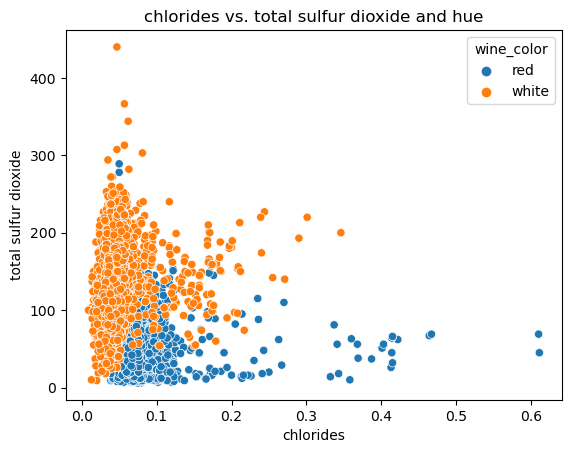

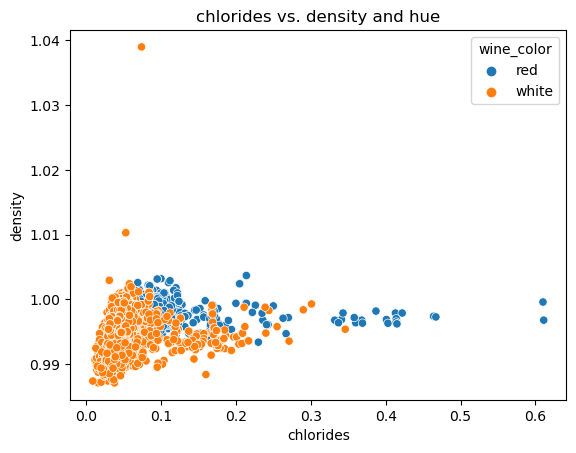

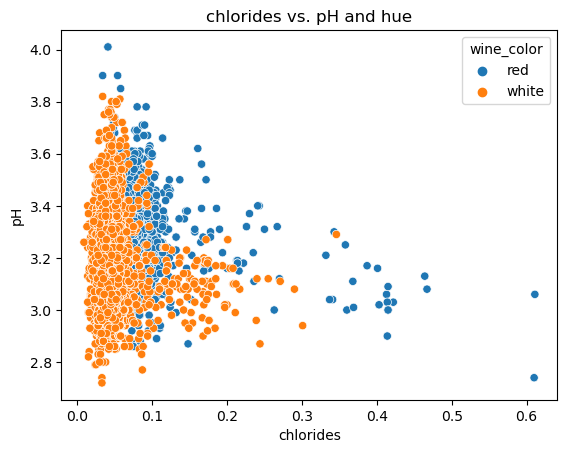

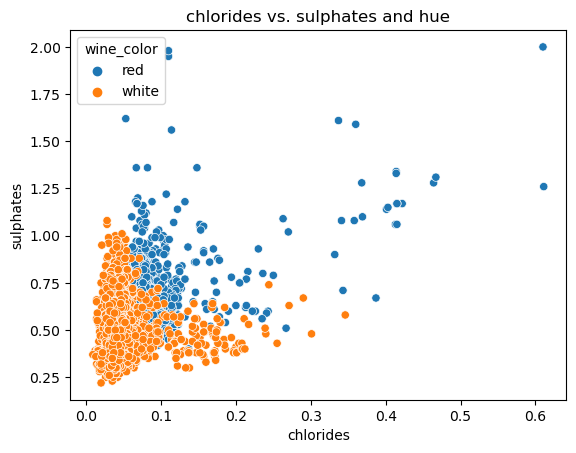

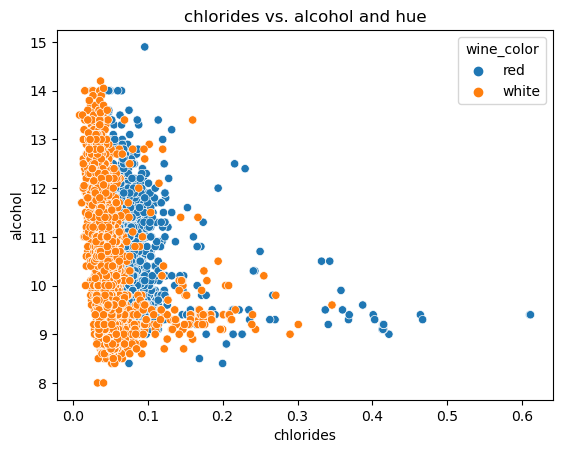

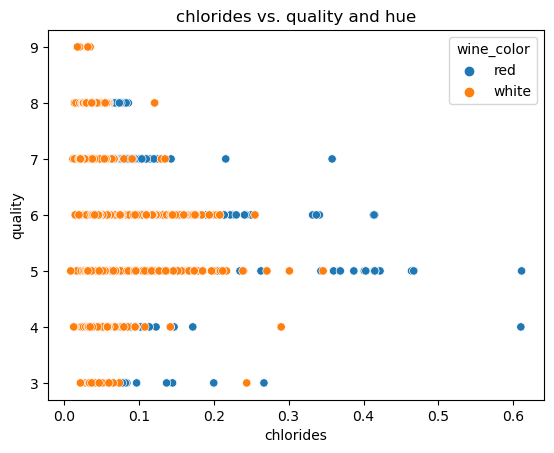

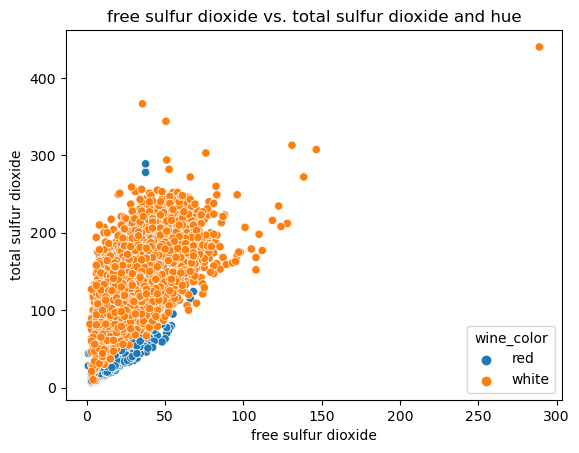

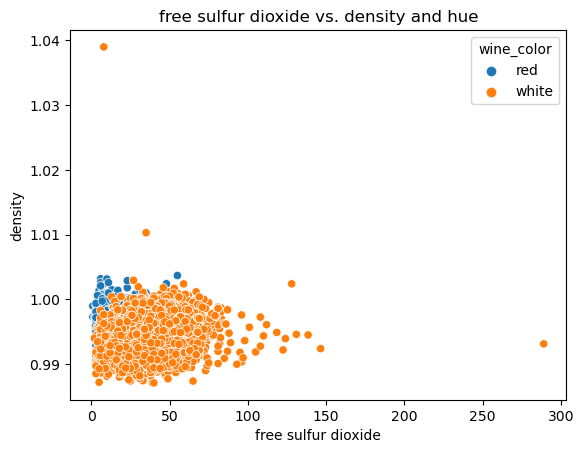

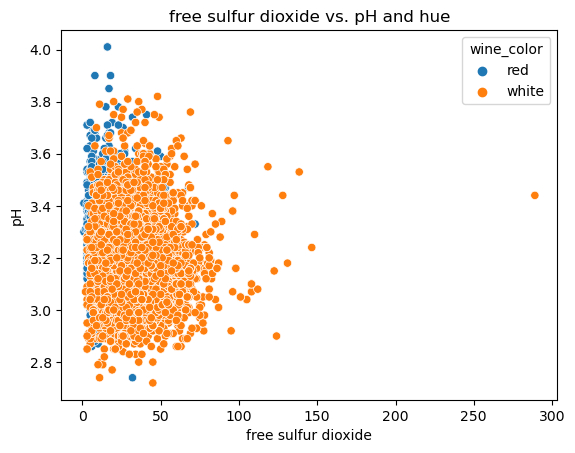

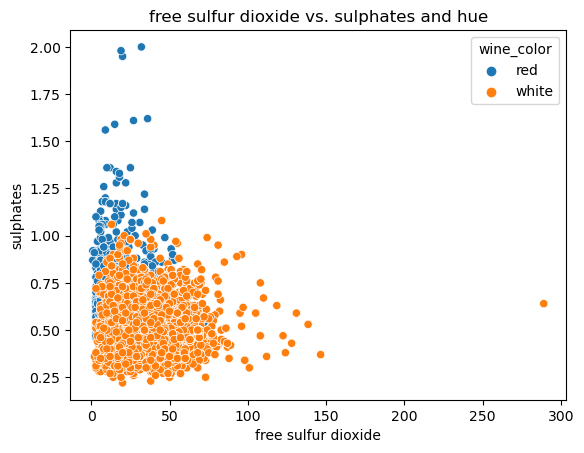

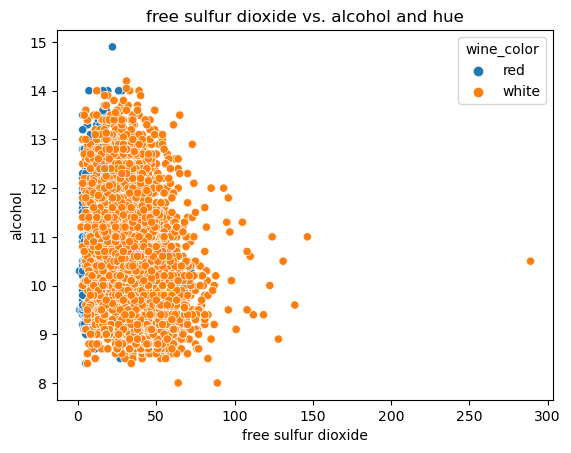

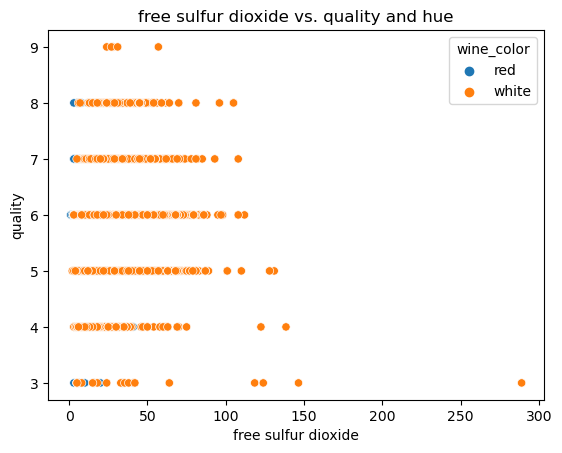

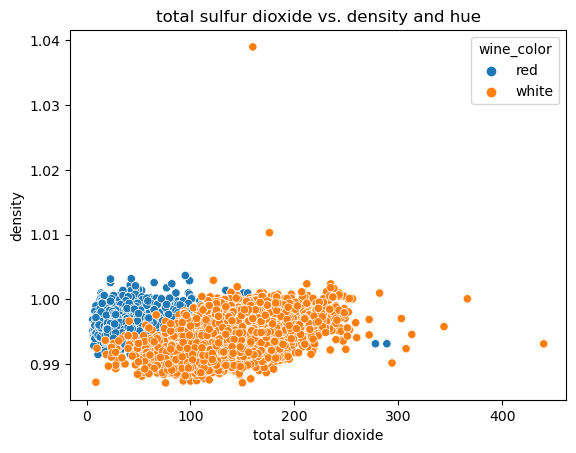

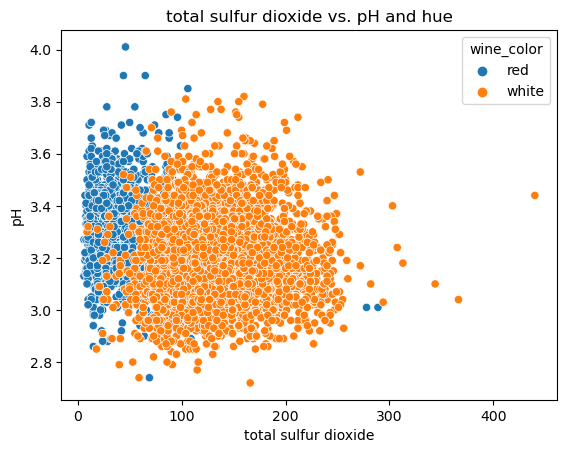

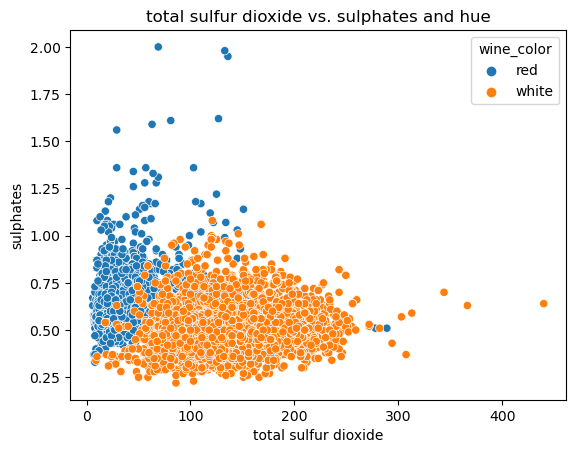

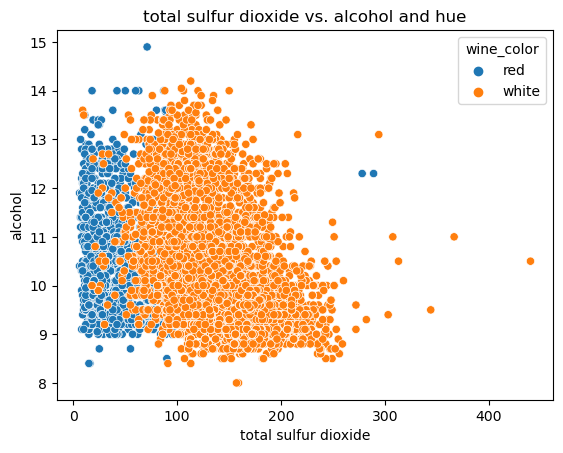

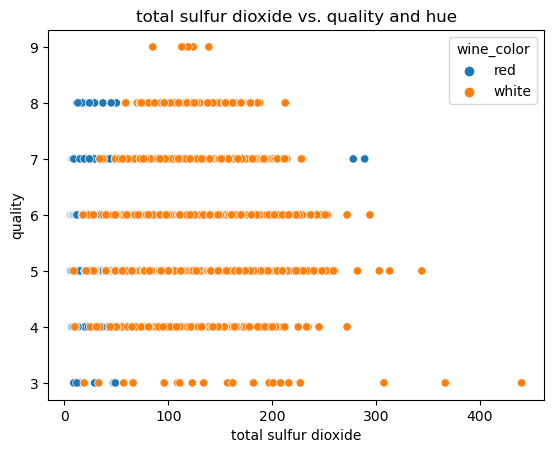

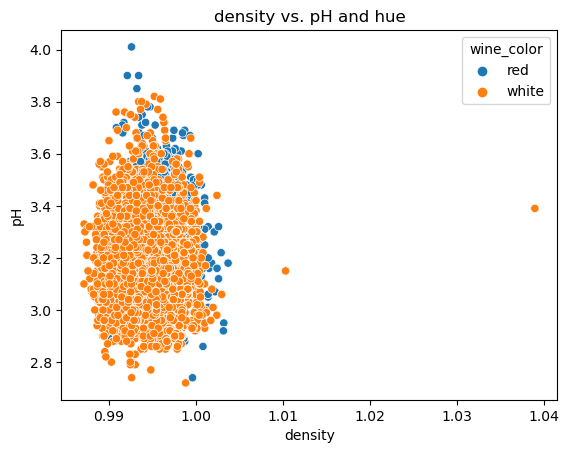

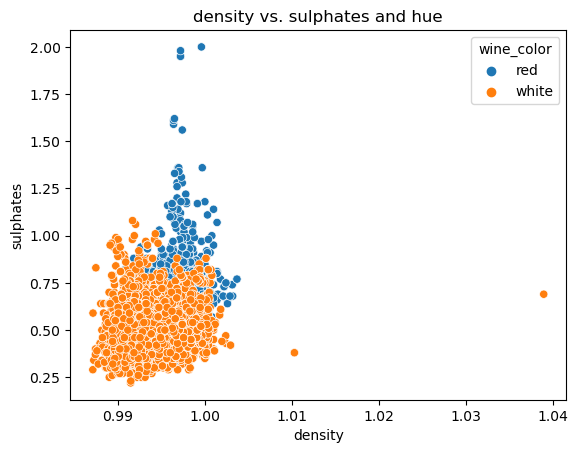

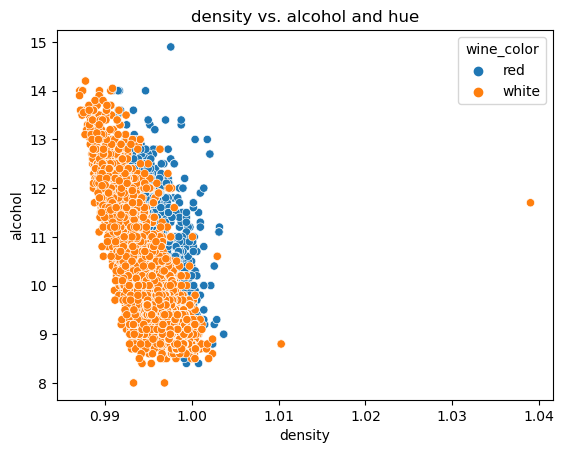

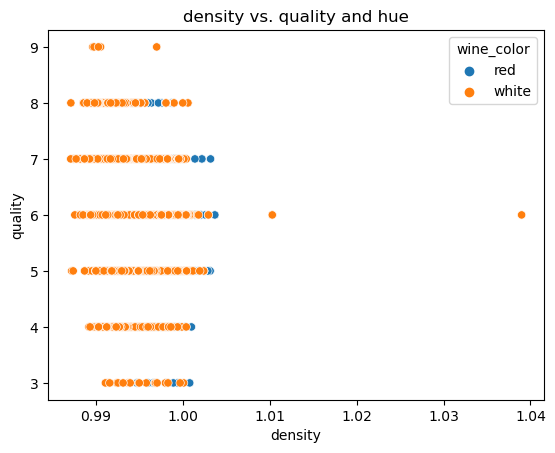

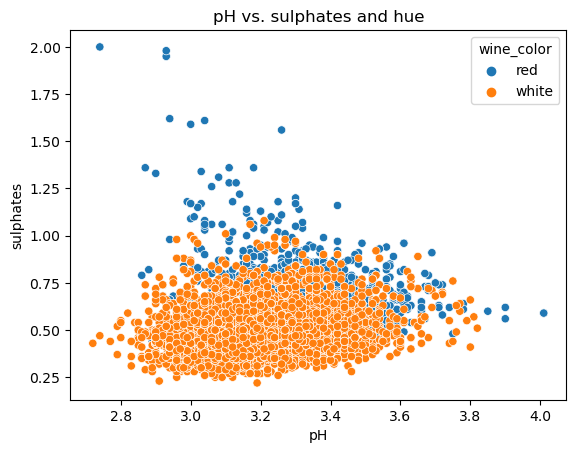

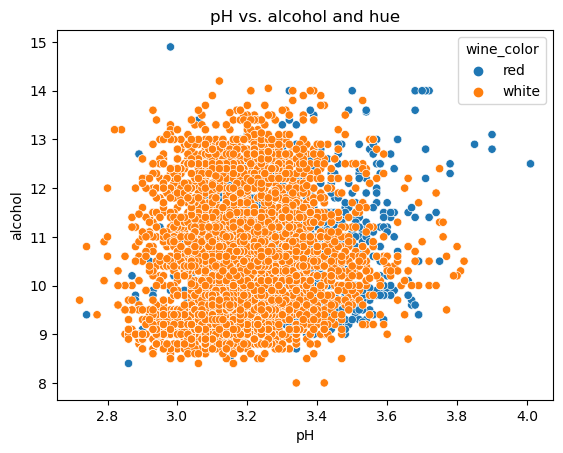

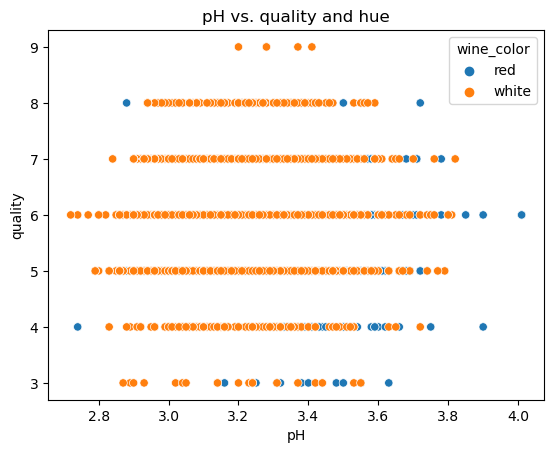

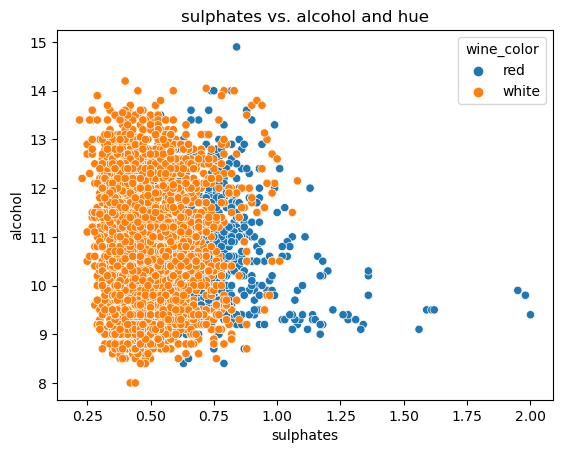

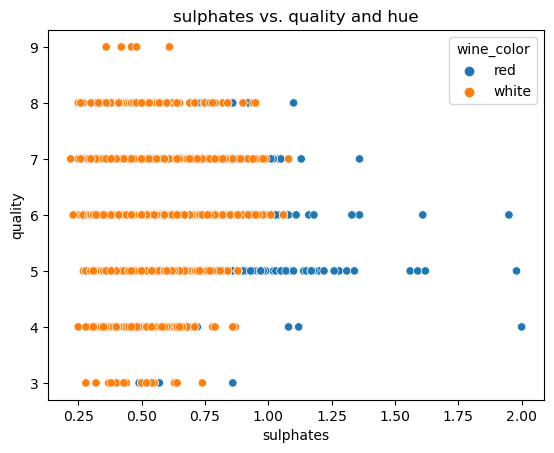

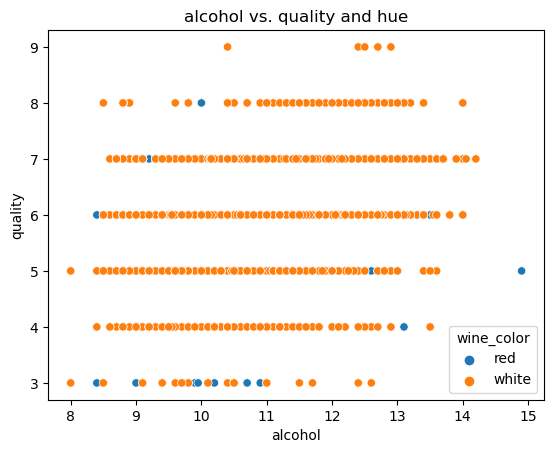

In [23]:
# Identify cols for scatterplots
colforexp = wines.drop(columns='wine_color').columns.to_list()
combos = list(itertools.combinations(colforexp, 2))
for combo in combos:
    sns.scatterplot(data=wines, x=combo[0], y=combo[1], hue='wine_color')
    plt.title(f'{combo[0]} vs. {combo[1]} and hue')
    plt.show()

In [30]:
wines.groupby(['wine_color', 'quality']).size()

wine_color  quality
red         3            10
            4            53
            5           681
            6           638
            7           199
            8            18
white       3            20
            4           163
            5          1457
            6          2198
            7           880
            8           175
            9             5
dtype: int64

<div style='background-color: orange'>
<a id='???'></a>
    <b><u><i><h1 style='text-align: center'>
        I don't fucking know yet
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

In [9]:
red, white = w.acquire()
white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

# clusters to create
- Tartness
- Structure
- Aroma
- Taste
- Sweetness
- Flavor
- MOuthfeel
- Acidity

In [5]:
# Create cols and combination of cols
fuckit_cols = train.drop(columns='wine_color').columns.to_list()
fuckit_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [6]:
for col in fuckit_cols:
    sns.scatterplot(data=train, x=col, y='logerror', line_kws={'color':'red'})
    plt.title(f'{col} vs logerror')
    plt.show()
    r, p = stats.spearmanr(train[col], train.logerror)
    alpha = 0.05
    if p < alpha:
        print(f'\033[32mREJECT NULL HYPOTHESIS!\033[0m')
        print(f'\033[35mFeature:\033[0m {col}')
        print(f'\033[35mCorrelation:\033[0m {r:.4f}')
        print(f'\033[35mP-Value:\033[0m {p:.4f}')
    else:
        print(f'\033[31mACCEPT NULL HYPOTHESIS!\033[0m')
        print(f'\033[35mFeature:\033[0m {col}')
        print(f'\033[35mCorrelation:\033[0m {r:.4f}')
        print(f'\033[35mP-Value:\033[0m {p:.4f}')

ValueError: Could not interpret value `logerror` for parameter `y`

In [ ]:
sns.boxplot(data=train, x='maxtransactiondate', y='logerror')
plt.title('maxtransactiondate vs. logerror')
plt.show()

- Trends for lower logerror (Visuals)
    - Does logerror differ by location
        - Latitude is higher
        - Longitude is lower
        - fips == 6111
    - Does logerror differ by rooms
        - bathrooms > 6 OR == 0
        - bedrooms > 6 OR == 0
        - fullbathrooms > 6
        - roomcnt 1-4 OR 10+
    - Does logerror differ by room types
        - Not necessarily
    - Does logerror differ by home area
        - home sqft is higher
    - Does logerror differ by lot area
        - lot sqft is higher

<div style='background-color: orange'>
<a id='bonus'></a>
    <b><u><i><h1 style='text-align: center'>
        Bonus
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

### Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.